In [4]:
import pandas as pd
import re

# 1. Muat Data
# Pastikan nama file sesuai
file_path = "Untitled spreadsheet - Pelabelan data.csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File tidak ditemukan di jalur: {file_path}")
    exit()

# 2. Persiapan Lexicon (Kamus Kata) Sederhana
# Anda bisa memperluas daftar ini untuk akurasi yang lebih baik
# Menggunakan huruf kecil semua untuk pencocokan yang lebih mudah
positive_words = set([
    "mantap", "terbaik", "bagus", "memuaskan", "excelent", "nyaman", 
    "sejuk", "ramah", "informatif", "bersahabat", "mulus", "sesuai", 
    "top", "awet", "puas", "baik", "oke"
])

negative_words = set([
    "buruk", "jelek", "kecewa", "masalah", "rusak", "cacat", 
    "lambat", "mahal", "tidak sesuai", "kurang"
])

# 3. Fungsi Pembersihan Teks Dasar
def clean_text(text):
    if pd.isna(text):
        return ""
    # Hapus karakter non-alfanumerik (kecuali spasi) dan ubah ke huruf kecil
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    return text.lower()

# 4. Fungsi Pelabelan Sentimen
def analyze_sentiment(review):
    # Bersihkan dan pisahkan ulasan menjadi kata-kata
    cleaned_review = clean_text(review)
    words = cleaned_review.split()
    
    # Hitung skor sentimen
    pos_score = sum(1 for word in words if word in positive_words)
    neg_score = sum(1 for word in words if word in negative_words)
    
    # Tentukan label
    if pos_score > neg_score:
        return "Positif"
    elif neg_score > pos_score:
        return "Negatif"
    else:
        # Netral jika skor positif dan negatif sama, atau keduanya nol
        return "Netral"

# 5. Aplikasikan Fungsi Pelabelan
# Pastikan nama kolom ulasan sudah benar, di sini diasumsikan "teks_ulasan"
df['sentimen_label'] = df['teks_ulasan'].apply(analyze_sentiment)

# 6. Tampilkan Hasil (5 baris pertama)
print("\n✅ Hasil Pelabelan Sentimen:")
print(df[['nama_penulis', 'rating', 'teks_ulasan', 'sentimen_label']].head())

# 7. Simpan Hasil ke File CSV Baru (Opsional)
df.to_csv('data_terlabeli_sentimen.csv', index=False)
print("\nData telah disimpan ke 'data_terlabeli_sentimen.csv'")


✅ Hasil Pelabelan Sentimen:
                   nama_penulis  rating  \
0     MUHAMMAD HIBZAH DASA OKKA     5.0   
1                  Wafa Wardana     5.0   
2  Azka Rusyda Farsya Kusmayadi     5.0   
3                     neviestaa     5.0   
4               Surya Ramadhani     5.0   

                                         teks_ulasan sentimen_label  
0  Mantap, laptop mereka second hand tapi baramg ...        Positif  
1  Terbaik. Pilihan utama laptop secondhand berku...        Positif  
2  Beli laptop disini udah yang ke 2x nya udah be...        Positif  
3  Pengalaman belanja di Hero bener-bener memuask...        Positif  
4  Barang-barang yang di jual bagus² dan masih pa...        Positif  

Data telah disimpan ke 'data_terlabeli_sentimen.csv'


#MODEL NAIVE BAYES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score


# 1. LOAD DATASET
df = pd.read_csv("Pelabelan Manual.csv")

# Kolom teks dan label
X = df["teks_ulasan"]
y = df["sentimen"]

# 2. SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 3. PIPELINE TF-IDF + NAIVE BAYES

model = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("nb", MultinomialNB())
])


# 4. TRAIN MODEL
model.fit(X_train, y_train)

# 5. EVALUASI
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n")
print(classification_report(y_test, y_pred))

# 6.  PREDIKSI

contoh = ["Pelayanan sangat bagus dan cepat"]
print("Prediksi untuk contoh:", model.predict(contoh)[0])


Akurasi: 0.82

Laporan Klasifikasi:

              precision    recall  f1-score   support

     Negatif       0.91      0.95      0.93        21
      Netral       1.00      0.22      0.36         9
     Positif       0.73      0.95      0.83        20

    accuracy                           0.82        50
   macro avg       0.88      0.71      0.71        50
weighted avg       0.85      0.82      0.79        50

Prediksi untuk contoh: Positif


In [3]:
# =====================================================
# 7. LOAD DATA UNLABELED
# =====================================================
df_unlabeled = pd.read_csv("Data_Unlabeled.csv")

# Pastikan kolom teks ada
if "teks_ulasan" not in df_unlabeled.columns:
    raise ValueError("Kolom 'teks_ulasan' tidak ditemukan di Data_Unlabeled.csv")

# =====================================================
# 8. HANDLE MISSING VALUES (WAJIB!)
# =====================================================

# Hilangkan baris yang seluruhnya NaN
df_unlabeled = df_unlabeled.dropna(how='all')

# Isi kolom teks yang NaN dengan string kosong
df_unlabeled["teks_ulasan"] = df_unlabeled["teks_ulasan"].fillna("")

# Ambil kolom teks
X_unlabeled = df_unlabeled["teks_ulasan"]

# =====================================================
# 9. PREDIKSI LABEL
# =====================================================
predicted_labels = model.predict(X_unlabeled)

# Tambahkan kolom label
df_unlabeled["prediksi_sentimen"] = predicted_labels

# =====================================================
# 10. SIMPAN HASIL
# =====================================================
df_unlabeled.to_csv("Data_Unlabeled_Labeled.csv", index=False)

print("Proses selesai! File 'Data_Unlabeled_Labeled.csv' berhasil dibuat.")


Proses selesai! File 'Data_Unlabeled_Labeled.csv' berhasil dibuat.


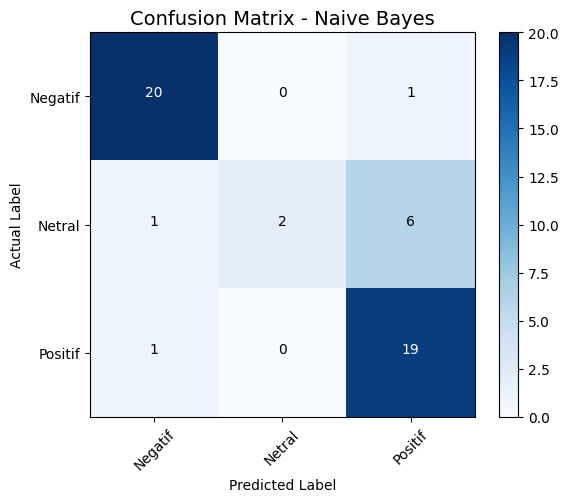

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# =====================================================
# 1. LOAD DATASET
# =====================================================
df = pd.read_csv("Pelabelan Manual.csv")

X = df["teks_ulasan"]
y = df["sentimen"]

# =====================================================
# 2. SPLIT DATA
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =====================================================
# 3. TRAIN MODEL
# =====================================================
model = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("nb", MultinomialNB())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# =====================================================
# 4. CONFUSION MATRIX BIRU–PUTIH
# =====================================================
labels = model.classes_
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', cmap="Blues")  # Biru–putih

plt.title("Confusion Matrix - Naive Bayes", fontsize=14)
plt.colorbar()

tick_marks = range(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Label angka di setiap kotak
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black"
        )

plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


In [15]:
!pip install wordcloud



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


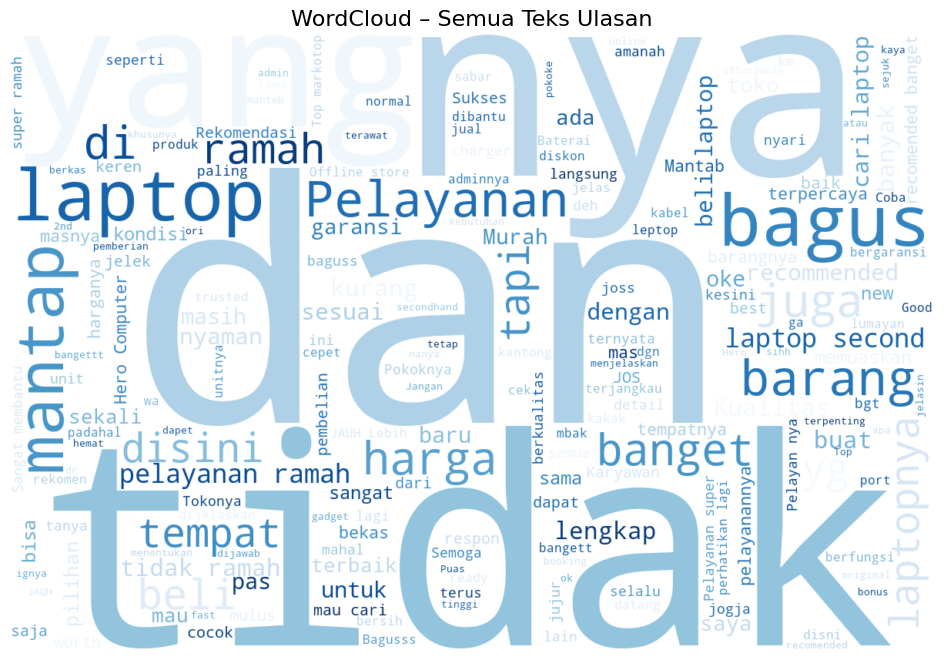

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan seluruh teks ulasan menjadi satu string besar
text_all = " ".join(df["teks_ulasan"].astype(str))

# Membuat WordCloud
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color="white",
    colormap="Blues",     # warna biru-putih agar selaras dengan confusion matrix
    max_words=200
).generate(text_all)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud – Semua Teks Ulasan", fontsize=16)
plt.show()


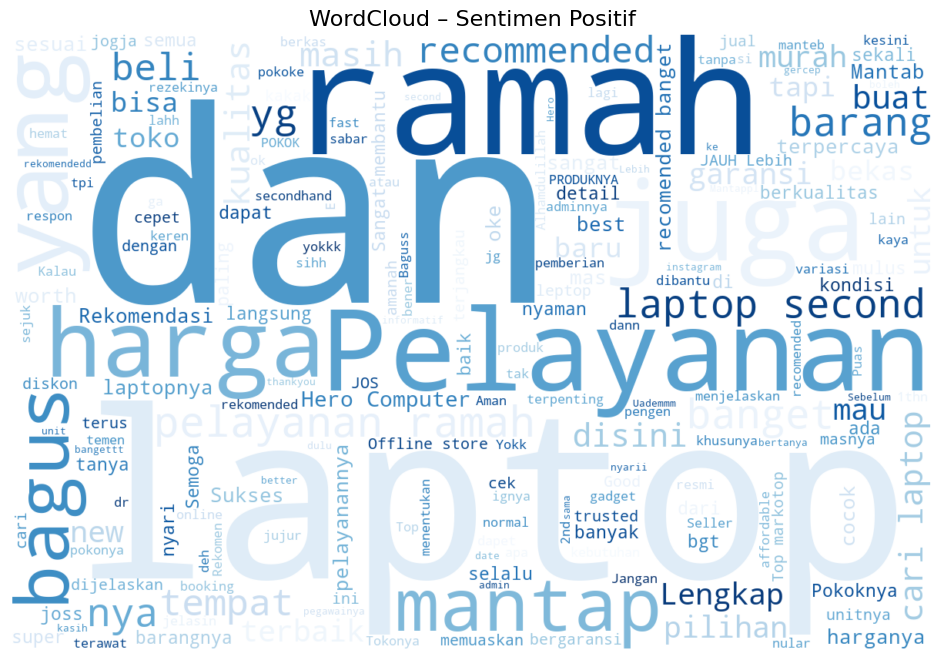

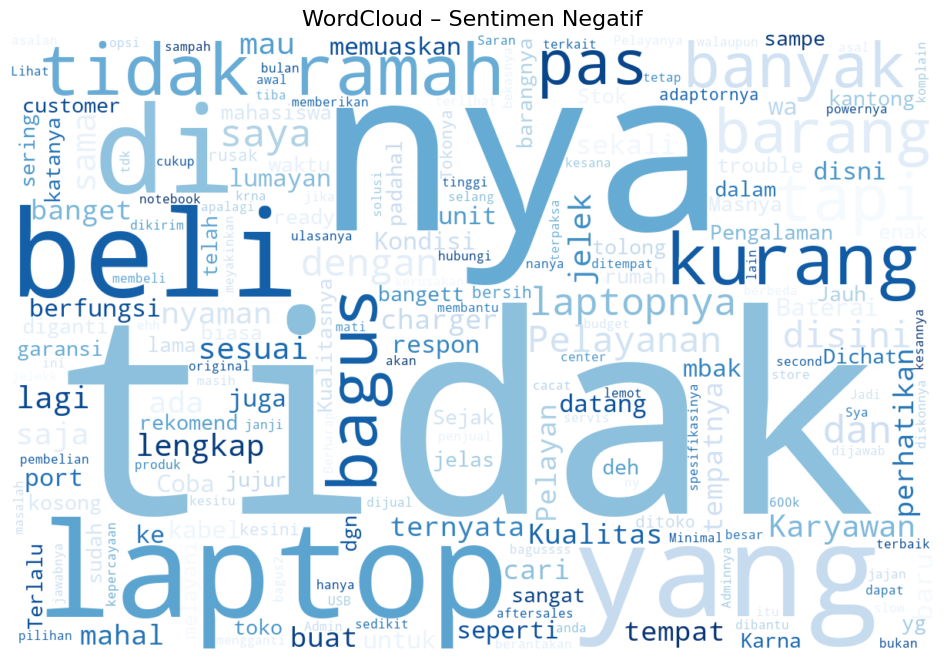

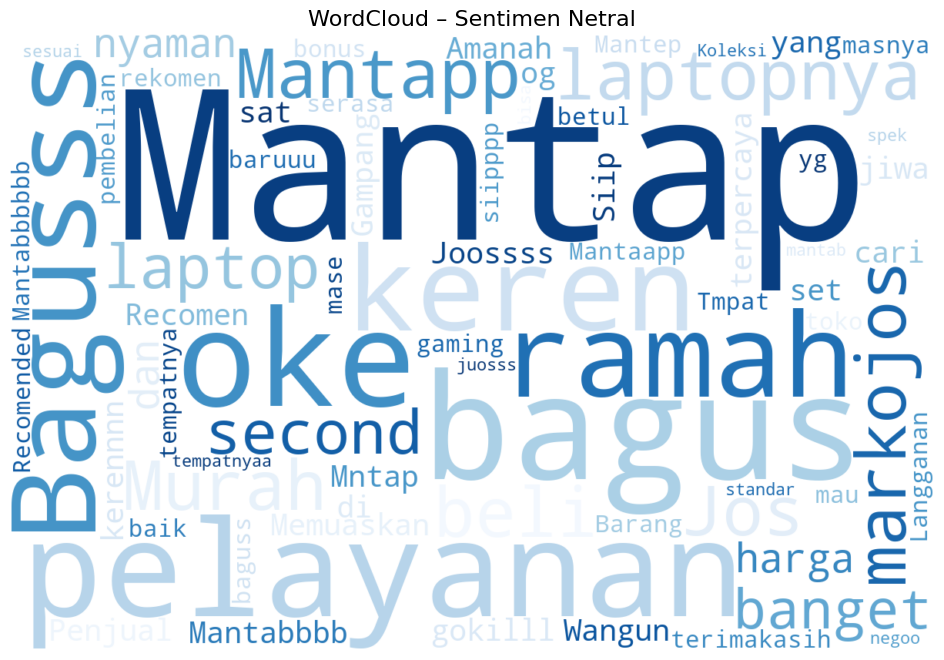

In [17]:
def tampilkan_wordcloud(df, label, warna="Blues"):
    teks = " ".join(df[df["sentimen"] == label]["teks_ulasan"].astype(str))

    wc = WordCloud(
        width=1200, height=800,
        background_color="white",
        colormap=warna
    ).generate(teks)

    plt.figure(figsize=(12, 8))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud – Sentimen {label}", fontsize=16)
    plt.show()

# WordCloud per kategori
tampilkan_wordcloud(df, "Positif")
tampilkan_wordcloud(df, "Negatif")
tampilkan_wordcloud(df, "Netral")


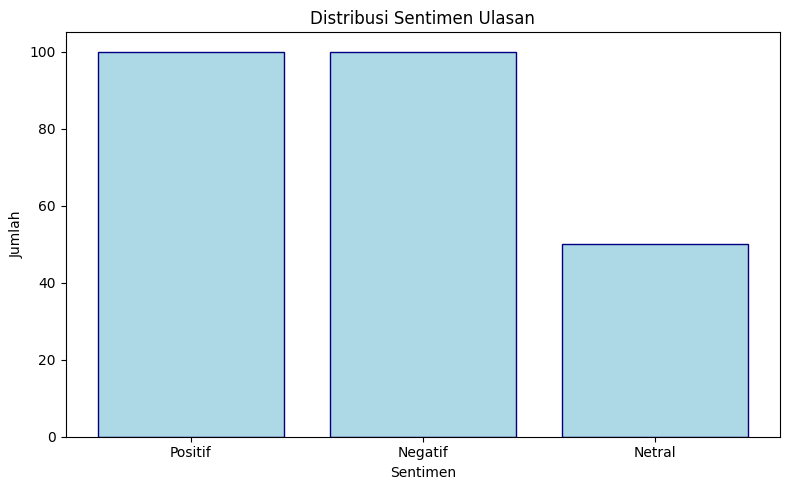

In [20]:
# --- Hitung jumlah masing-masing sentimen ---
sentiment_counts = df["sentimen"].value_counts()

# --- Diagram Distribusi Sentimen Ulasan (tema biru-putih) ---
plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color="lightblue", edgecolor="navy")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.title("Distribusi Sentimen Ulasan")
plt.tight_layout()
plt.show()